In [1]:
# Import the main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [14]:
df = pd.read_csv('parkinson_disease.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


#### Observing the dataset we can see that there is a column for id identification, and another one for the gender of the subject, and different parkinson-related markers. Before starting with the data analysis, we can safely drop the id column since it does not contribute to the outcome of the prediction.

In [16]:
df.drop('id', axis = 1, inplace = True)
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


#### Next, we will perform some statistical analysis of the dataset

In [24]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
numPulses,756.0,323.972222,99.219059,2.000000,251.000000,317.000000,384.250000,907.00000
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


#### Check if there are some missing values

In [30]:
df.isnull().sum() #Since there are no missing values, we do not need to adress this issue and manually fill them

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

## Exploratory Data Analysis

#### In other conditions, a correlation map is an useful tool to analyse the variables, but in this particular case we have 754 columns in the dataset, so making a correlation map will take too much time. Instead of that, we have to know a little about the columns in the dataset. In this case, the majority of columns are derived from one another, so they present a high degree of correlation. Due to this, some of them are presenting pretty similar information, so we can try to drop the columns that are highly correlated between them.

#### With this idea in mind, we can compare the correlation between columns and drops the ones that cross a particular threshold.

In [53]:
columns = list(df.columns)   # First we create a list with the names of the different columns in the dataset

for col in columns:     # loop through each element of the list
    if col == 'class':  # With this line we avoid to include in the correlation examination the target column
        continue
        
    filtered_columns = [col]   # We create a new list with the name of the analysed column
    for col1 in df.columns:    # Begin a new loop to compare the current column (col) with every other column
        if ((col == col1) | (col == 'class')):   # Skips the iteration if col and col1 are the same (no need to check correlation) or if we are in the target column
            continue

        val = df[col].corr(df[col1])   # We analyse the correlation between the two columns and generate a variable for it
        if val > 0.7:                  # We set the correlation threshold 
            columns.remove(col1)       # We remove the highly correlated column
            continue
        else:
            filtered_columns.append(col1)    # We maintain the non-correlated columns
    df = df[filtered_columns]    # Finally we select only the non-correlated columns

In [55]:
df.shape

(756, 313)

#### We can observe that the dimension of the dataset has been significantly reduced to 313 columns. Nevertheless, they are still too many columns to process. In order to reduce the number, we will apply a Chi-square test to evaluate if there is a significant association between two variables.

In [81]:
X = df.drop('class', axis = 1)    # First we select all the columns except from the target

from sklearn.preprocessing import MinMaxScaler   # Now we have to scale the values in the array between 0 and 1 using MinMaxScaler
sc = MinMaxScaler()
X_norm = sc.fit_transform(X)    # Scaled values

In [83]:
# Now we will select the top K features that have the strongest relationship with the target variable using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k = 30)       # We create a SelectKBest object using Chi2 as a statistical test and 30 as the final number of columns
selector.fit(X_norm, df['class'])     # We apply the chi2 test to our data and compare the relation with the target column
filtered_columns = selector.get_support()   # This code retrieves a boolean array indicating which features were selected, leaving the top 30 features
filtered_data = X.loc[:, filtered_columns]  # Filters the original dataframe to include only the selected columns
filtered_data['class'] = df['class']
df = filtered_data
df.shape

C:\Users\gabri\AppData\Local\Temp\ipykernel_6436\3127100317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['class'] = df['class']


(756, 31)

In [85]:
df.head()

,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_25,tqwt_minValue_dec_14,tqwt_TKEO_mean_dec_13,tqwt_entropy_log_dec_27,tqwt_entropy_shannon_dec_35,tqwt_entropy_shannon_dec_15,tqwt_entropy_shannon_dec_11,...,std_11th_delta_delta,std_7th_delta,mean_MFCC_2nd_coef,IMF_SNR_SEO,VFER_mean,f1,locPctJitter,DFA,gender,class
0,2.6202,1.5620,1.6058,2.0062,-0.108390,0.000128,-2800.8383,0.015562,174.6920,4.8840,...,0.010043,0.042253,2.4874,51.6843,0.000463,539.342735,0.00218,0.71826,1,1
1,6.5245,1.5589,1.5772,2.0470,-0.101340,0.000098,-3078.5008,0.023860,140.8136,4.8483,...,0.015488,0.037071,2.8986,24.0230,0.000615,564.363615,0.00195,0.69481,1,1
2,2.9199,1.5643,1.5921,3.2597,-0.081836,0.000045,-3829.1785,0.020677,84.8129,1.9849,...,0.015073,0.051511,3.2208,60.0458,0.000360,548.444604,0.00176,0.67604,1,1
3,4.8460,3.7805,1.8829,1.9120,-0.586380,0.002862,-7018.6958,1.737700,572.9586,3.2053,...,0.013770,0.035142,3.1023,83.6201,0.000196,819.529588,0.00419,0.79672,0,1
4,8.2103,6.1727,1.8821,1.7577,-0.505800,0.002707,-7392.1333,1.028700,647.2537,2.7170,...,0.013402,0.033943,2.9451,102.9371,0.000281,846.796144,0.00535,0.79782,0,1


#### Now that we have a much smaller dataset, we can check if the data is balanced

In [94]:
target = df['class'].value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Parkinson': target.index,
                         'Counts': target.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

   Parkinson  Counts
0          1     564
1          0     192


Text(0, 0.5, 'Counts')

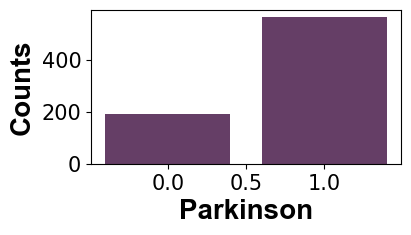

In [114]:
# Plotting the values in a bar plot for clearer understanding
plt.figure(figsize=(4, 2))
plt.bar(dis_data['Parkinson'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Parkinson', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Counts', fontsize = 20, fontweight='bold', **csfont)

#### We can clearly observe that the data is heavily imbalanced, which may affect the model ability to predict one of the classes, so we will need to address this issue.

## Train/test split

In [118]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

#### One of the ways to address the imbalance problem is to use the over-sampling method on the minority class. This technique increases the representation of the minority class in the dataset in order to balance the distribution. For that, this method creates additional samples for the minority class to match or approximate the size of the majority class.

#### We install the imbalanced-learn module to acces to the RandomOverSampler

In [132]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 20.5/258.3 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 245.8 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 393.8 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 992.3 kB/s eta 0:00:00


In [160]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state = 19)
X, y = ROS.fit_resample(X_train, y_train)

#### Now we can check if the data is balanced

In [164]:
target = pd.Series(y).value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Parkinson': target.index,
                         'Counts': target.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

   Parkinson  Counts
0          0     451
1          1     451


Text(0, 0.5, 'Counts')

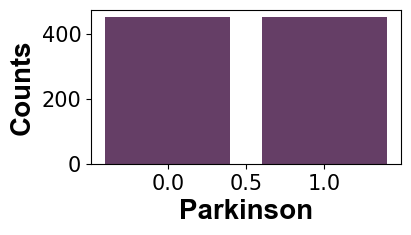

In [170]:
# Plotting the values in a bar plot for clearer understanding
plt.figure(figsize=(4, 2))
plt.bar(dis_data['Parkinson'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Parkinson', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Counts', fontsize = 20, fontweight='bold', **csfont)

## Training the model

#### Now that the data is normalised and balanced, we can train the model. In this case, we could use different classification models, but we are going to focus on XGBoost

In [175]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

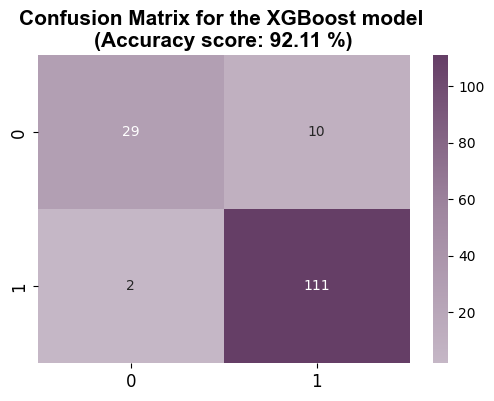

In [181]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_xg = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the XGBoost model \n(Accuracy score: {accuracy_score(y_test, y_pred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout